# Price Prediction

import all the libraries useful for the airbnb listings price prediction

In [1]:
# import the libraries to handle table-like data and matrices
import numpy as np
import pandas as pd

# import the libraries for training and testing purposes
from sklearn.cross_validation import train_test_split

# for calculations on array-like matrices
import numpy as np
from scipy import sparse
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import train_test_split 

# import the libraries for performing the regression and predicting the price
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# import the library for visualization - plotting
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.pyplot as plt

# open and read the Listings Detail csv file
listings_Data = pd.read_csv('J:/SJSU/Projects/Sem3/256/256/datasets/listings_detail.csv')

C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C

## Data Preprocessing

In [2]:
# filter all the columns that make sense for predicting the price
combined_DF = listings_Data.filter([
    'neighbourhood_cleansed', 'city', 'zipcode', 'latitude', 'longitude', 'maximum_nights', 'availability_365', 'accommodates', 
    'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included', 'extra_people', 'minimum_nights', 'property_type',
    'availability_30', 'availability_60', 'availability_90',u'room_type', u'number_of_reviews', u'review_scores_rating',
    u'review_scores_accuracy', u'review_scores_cleanliness', u'review_scores_checkin', u'review_scores_communication',
    u'review_scores_location', u'review_scores_value',u'host_listing_count', u'host_since', u'first_review', 
    u'last_review','price'], axis=1)

In [3]:
# drop the Nan values rows
combined_DF = combined_DF.dropna()

In [4]:
# filter out the target variable - price column 
prices_new = combined_DF.filter(['price'])

In [5]:
# drop the target variable - price column from the dependant variables data frame
combined_DF = combined_DF.drop(['price'], axis=1)

In [6]:
# perform one hot encoding on the features relavent to the price prediction
# One hot encoding is a process by which categorical variables are converted into a form 
# that could be provided to ML algorithms to do a better job in prediction.
# The categorical variables are converted into binary form
updated_data = pd.DataFrame({})

In [7]:
# for all the columns in the dependant variables data frame, pick the values whose data type is an object
# and perform the one hot encoding fo the column
for column in combined_DF.columns:
    if combined_DF[column].dtype == np.dtype('object'):
        encoding = pd.get_dummies(combined_DF[column])
        updated_data = pd.concat([updated_data, encoding], axis=1)
    else:
        updated_data = pd.concat([updated_data, combined_DF[[column]]], axis=1)

Perform the datapreprocessing step for the price column and remove the $ symbol

In [8]:
prices_new['price'] = prices_new['price'].map(lambda x: 
                                              str(x)
                                              .lstrip('$')
                                              .replace(',',''))
prices_new['price'] = prices_new['price'].map(lambda x: 
                                              int(float(x)))

In [9]:
# Just a preliminary check to make sure the values does not contain any null values
print(prices_new.isnull().values.any())
print(updated_data.isnull().values.any())

# Count of the dependant variables and the target variables
print(prices_new.count())
print(updated_data.count())

False
False
price    33179
dtype: int64
Allerton              33179
Arden Heights         33179
Arrochar              33179
Arverne               33179
Astoria               33179
Bath Beach            33179
Battery Park City     33179
Bay Ridge             33179
Bay Terrace           33179
Baychester            33179
Bayside               33179
Bayswater             33179
Bedford-Stuyvesant    33179
Belle Harbor          33179
Bellerose             33179
Belmont               33179
Bensonhurst           33179
Bergen Beach          33179
Boerum Hill           33179
Borough Park          33179
Briarwood             33179
Brighton Beach        33179
Bronxdale             33179
Brooklyn Heights      33179
Brownsville           33179
Bushwick              33179
Cambria Heights       33179
Canarsie              33179
Carroll Gardens       33179
Castle Hill           33179
                      ...  
2017-09-03            33179
2017-09-04            33179
2017-09-05            33179
2017-09-

In [10]:
# split the data to match the 
X_train, X_test, y_train, y_test = train_test_split(updated_data, prices_new, test_size=0.3)

In [11]:
y_test = y_test.values.tolist()

# Ridge Regression

In [12]:
# Ridge Regression
RidgeAlgorithm =  Ridge_Reg()

RidgeAlgorithm.fit(X_train, y_train)
print (RidgeAlgorithm.score(X_test, y_test))

C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.247901e-18
  overwrite_a=True).T


0.11527087286980908


148.13905673759405
12.171238915475863


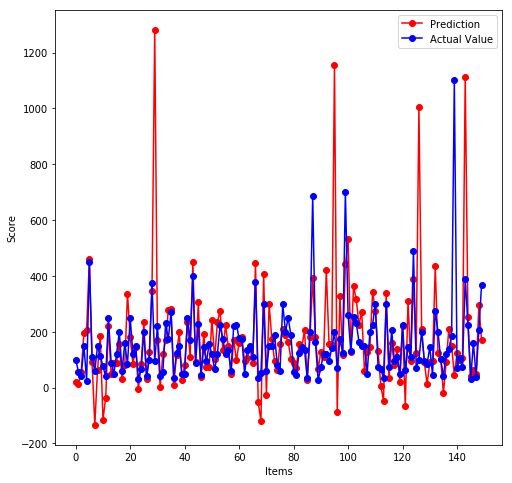

In [13]:
y_pred_ridge = RidgeAlgorithm.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_ridge))
print(rms)
print(rms ** (1/ 2.0))

score_plot = plt.rcParams["figure.figsize"]

score_plot[0] = 8
score_plot[1] = 8
plt.rcParams["figure.figsize"] = score_plot

plt.plot(y_pred_ridge[:150], '-or', label='Prediction')
plt.plot(y_test[:150], '-ob', label='Actual Value')
plt.ylabel('Score')
plt.xlabel('Items') 
plt.legend()

### Tuning the model with parameters

In [14]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge_Reg()
tunedRidgeAlgorithm = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

tunedRidgeAlgorithm.fit(X_train, y_train)
tunedRidgeAlgorithm.score(X_test, y_test)

C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.857672e-18
  overwrite_a=True).T
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.174699e-18
  overwrite_a=True).T
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.939202e-19
  overwrite_a=True).T
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.292657e-18
  overwrite_a=True).T
C:\Users

0.11527087286980908

148.13905673759405
12.171238915475863
Current size: [8.0, 8.0]


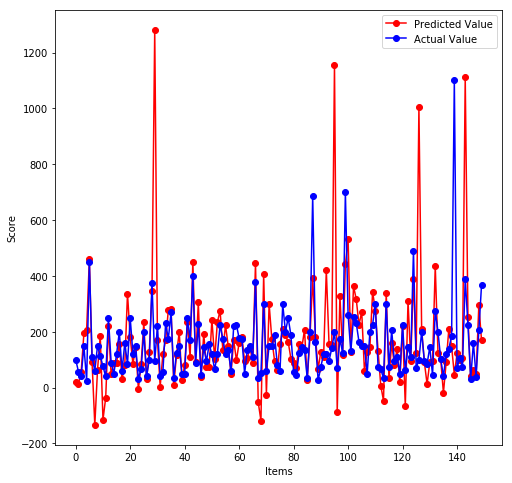

In [15]:
y_pred_tuned_ridge = tunedRidgeAlgorithm.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_tuned_ridge))
print(rms)
print(rms ** (1/ 2.0))

score_plot = plt.rcParams["figure.figsize"]
print("Current size:", score_plot)
 
score_plot[0] = 8
score_plot[1] = 8
plt.rcParams["figure.figsize"] = score_plot

plt.plot(y_pred_tuned_ridge[:150], '-or', label='Predicted Value')
plt.plot(y_test[:150], '-ob', label='Actual Value')
plt.ylabel('Score')
plt.xlabel('Items') 
plt.legend()

# Random Forest

In [16]:
# randomForest Regression
randomForestAlgorithm =  RandomForestRegressor()

randomForestAlgorithm.fit(X_train, y_train)
print (randomForestAlgorithm.score(X_test, y_test))

C:\Users\manvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.3049473340867711


131.30258280382145
11.458733909286028
Current size: [8.0, 8.0]


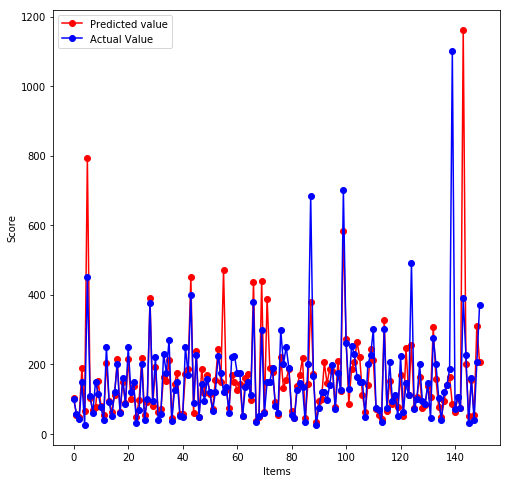

In [17]:
y_pred_random = randomForestAlgorithm.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_random))
print(rms)
print(rms ** (1/ 2.0))

score_plot = plt.rcParams["figure.figsize"]
 
print("Current size:", score_plot)
 
score_plot[0] = 8
score_plot[1] = 8
plt.rcParams["figure.figsize"] = score_plot

plt.plot(y_pred_random[:150], '-or', label='Predicted value')
plt.plot(y_test[:150], '-ob', label='Actual Value')
plt.ylabel('Score')
plt.xlabel('Items') 
plt.legend()

# Conclusion